# **American Sign Language Detection**

**Objective:**

Build a system that can detect a given ASL input image and output what the sign represents
(what letter of the alphabet is the sign).

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from PIL import Image
imgt = Image.open('/content/drive/MyDrive/Unified Mentor Projects/Data files/asl_alphabet_test/nothing_test.jpg')
print("Image size:", imgt.size)

Image size: (200, 200)


In [ ]:
!unzip "/content/drive/MyDrive/Unified Mentor Projects/Data files/asl_alphabet_train.zip" -d "/content/asl_alphabet_train"


Streaming output truncated to the last 5000 lines.
  inflating: /content/asl_alphabet_train/asl_alphabet_train/Y/Y190.jpg  
  inflating: /content/asl_alphabet_train/asl_alphabet_train/Y/Y1900.jpg  
  inflating: /content/asl_alphabet_train/asl_alphabet_train/Y/Y1901.jpg  
  inflating: /content/asl_alphabet_train/asl_alphabet_train/Y/Y1902.jpg  
  inflating: /content/asl_alphabet_train/asl_alphabet_train/Y/Y1903.jpg  
  inflating: /content/asl_alphabet_train/asl_alphabet_train/Y/Y1904.jpg  
  inflating: /content/asl_alphabet_train/asl_alphabet_train/Y/Y1905.jpg  
  inflating: /content/asl_alphabet_train/asl_alphabet_train/Y/Y1906.jpg  
  inflating: /content/asl_alphabet_train/asl_alphabet_train/Y/Y1907.jpg  
  inflating: /content/asl_alphabet_train/asl_alphabet_train/Y/Y1908.jpg  
  inflating: /content/asl_alphabet_train/asl_alphabet_train/Y/Y1909.jpg  
  inflating: /content/asl_alphabet_train/asl_alphabet_train/Y/Y191.jpg  
  inflating: /content/asl_alphabet_train/asl_alphabet_train/Y/Y

In [ ]:
import os
data_dir = "/content/asl_alphabet_train"
print(os.listdir(data_dir))

['asl_alphabet_train']


In [ ]:
from PIL import Image
img = Image.open('/content/asl_alphabet_train/asl_alphabet_train/A/A730.jpg')
print("Image size:", img.size)

Image size: (200, 200)


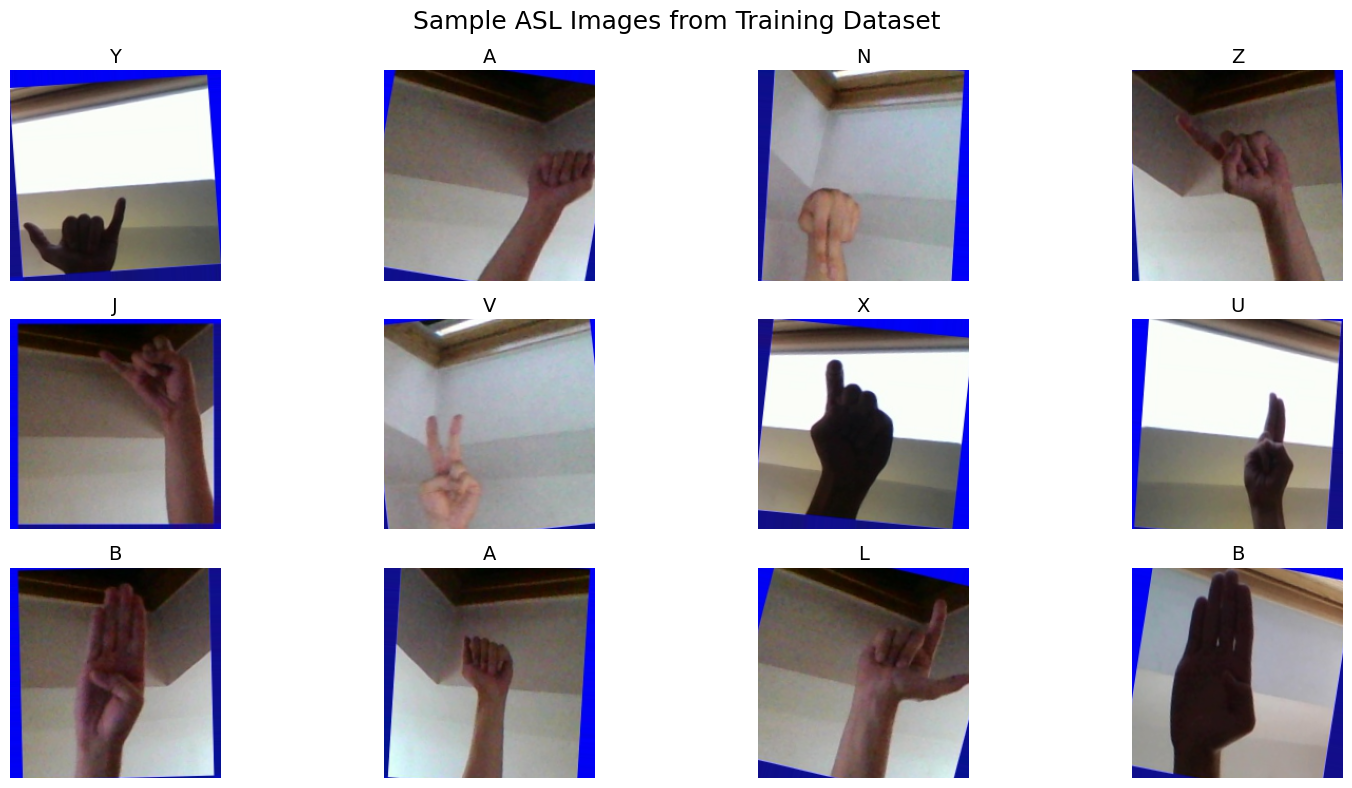

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Get a batch of images and labels
images, labels = next(train_generator)

# Define class names (same order as label indices)
class_names = list("ABCDEFGHIJKLMNOPQRSTUVWXYZ") + ['SPACE', 'DELETE', 'NOTHING']

# Show 12 sample images from the batch
plt.figure(figsize=(16, 8))
for i in range(12):
    plt.subplot(3, 4, i + 1)
    plt.imshow(images[i])
    label_index = np.argmax(labels[i])
    plt.title(class_names[label_index], fontsize=14)
    plt.axis('off')

plt.suptitle('Sample ASL Images from Training Dataset', fontsize=18)
plt.tight_layout()
plt.show()


In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

img_size = 200
batch_size = 32

train_dir = "/content/asl_alphabet_train/asl_alphabet_train"

datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    horizontal_flip=True,
    rotation_range=15,
    zoom_range=0.1
)

train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

val_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

class_names = list(train_generator.class_indices.keys())

Found 69600 images belonging to 29 classes.
Found 17400 images belonging to 29 classes.


In [ ]:
# CNN Model with 200x200 Input

In [ ]:
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Input(shape=(200, 200, 3)),

    layers.Conv2D(32, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(256, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(29, activation='softmax')  # 29 classes (A-Z + SPACE, DELETE, NOTHING)
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 198, 198, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 99, 99, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 97, 97, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 48, 48, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 46, 46, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 23, 23, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 21, 21, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 10, 10, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    13,107,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 29)             │        14,877 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,511,005 (51.54 MB)

 Trainable params: 13,511,005 (51.54 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=5
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
2175/2175 ━━━━━━━━━━━━━━━━━━━━ 864s 393ms/step - accuracy: 0.4009 - loss: 2.0148 - val_accuracy: 0.7151 - val_loss: 0.8970
Epoch 2/5
2175/2175 ━━━━━━━━━━━━━━━━━━━━ 842s 387ms/step - accuracy: 0.8805 - loss: 0.3522 - val_accuracy: 0.7624 - val_loss: 0.8071
Epoch 3/5
2175/2175 ━━━━━━━━━━━━━━━━━━━━ 818s 376ms/step - accuracy: 0.9332 - loss: 0.1981 - val_accuracy: 0.7898 - val_loss: 0.8805
Epoch 4/5
2175/2175 ━━━━━━━━━━━━━━━━━━━━ 822s 378ms/step - accuracy: 0.9504 - loss: 0.1477 - val_accuracy: 0.7840 - val_loss: 0.9989
Epoch 5/5
2175/2175 ━━━━━━━━━━━━━━━━━━━━ 812s 373ms/step - accuracy: 0.9594 - loss: 0.1266 - val_accuracy: 0.7958 - val_loss: 0.9003


In [ ]:

model.save("asl_model.h5")

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 198, 198, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 99, 99, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 97, 97, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 48, 48, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 46, 46, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 23, 23, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 21, 21, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 10, 10, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    13,107,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 29)             │        14,877 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 40,533,017 (154.62 MB)

 Trainable params: 13,511,005 (51.54 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 27,022,012 (103.08 MB)

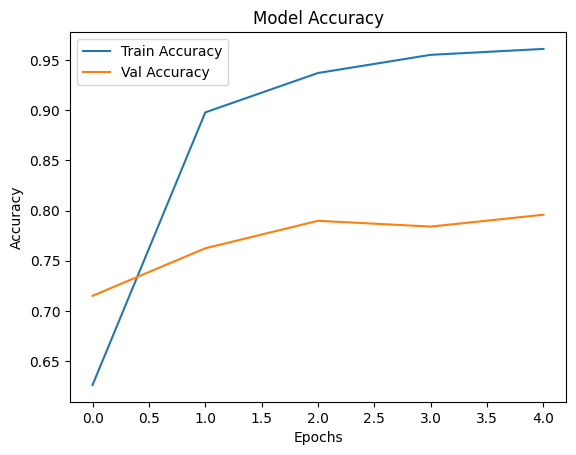

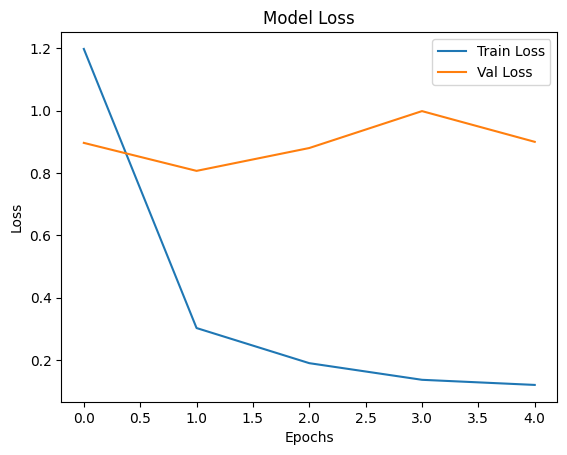

In [ ]:
import matplotlib.pyplot as plt

# Accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig('accuracy_curve.png')
plt.show()

# Loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.savefig('loss_curve.png')
plt.show()


In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np

# 1. Predict probabilities
y_pred_probs = model.predict(val_generator)

# 2. Get true labels and convert to one-hot
y_true = val_generator.classes
y_test = to_categorical(y_true, num_classes=29)




544/544 ━━━━━━━━━━━━━━━━━━━━ 154s 284ms/step


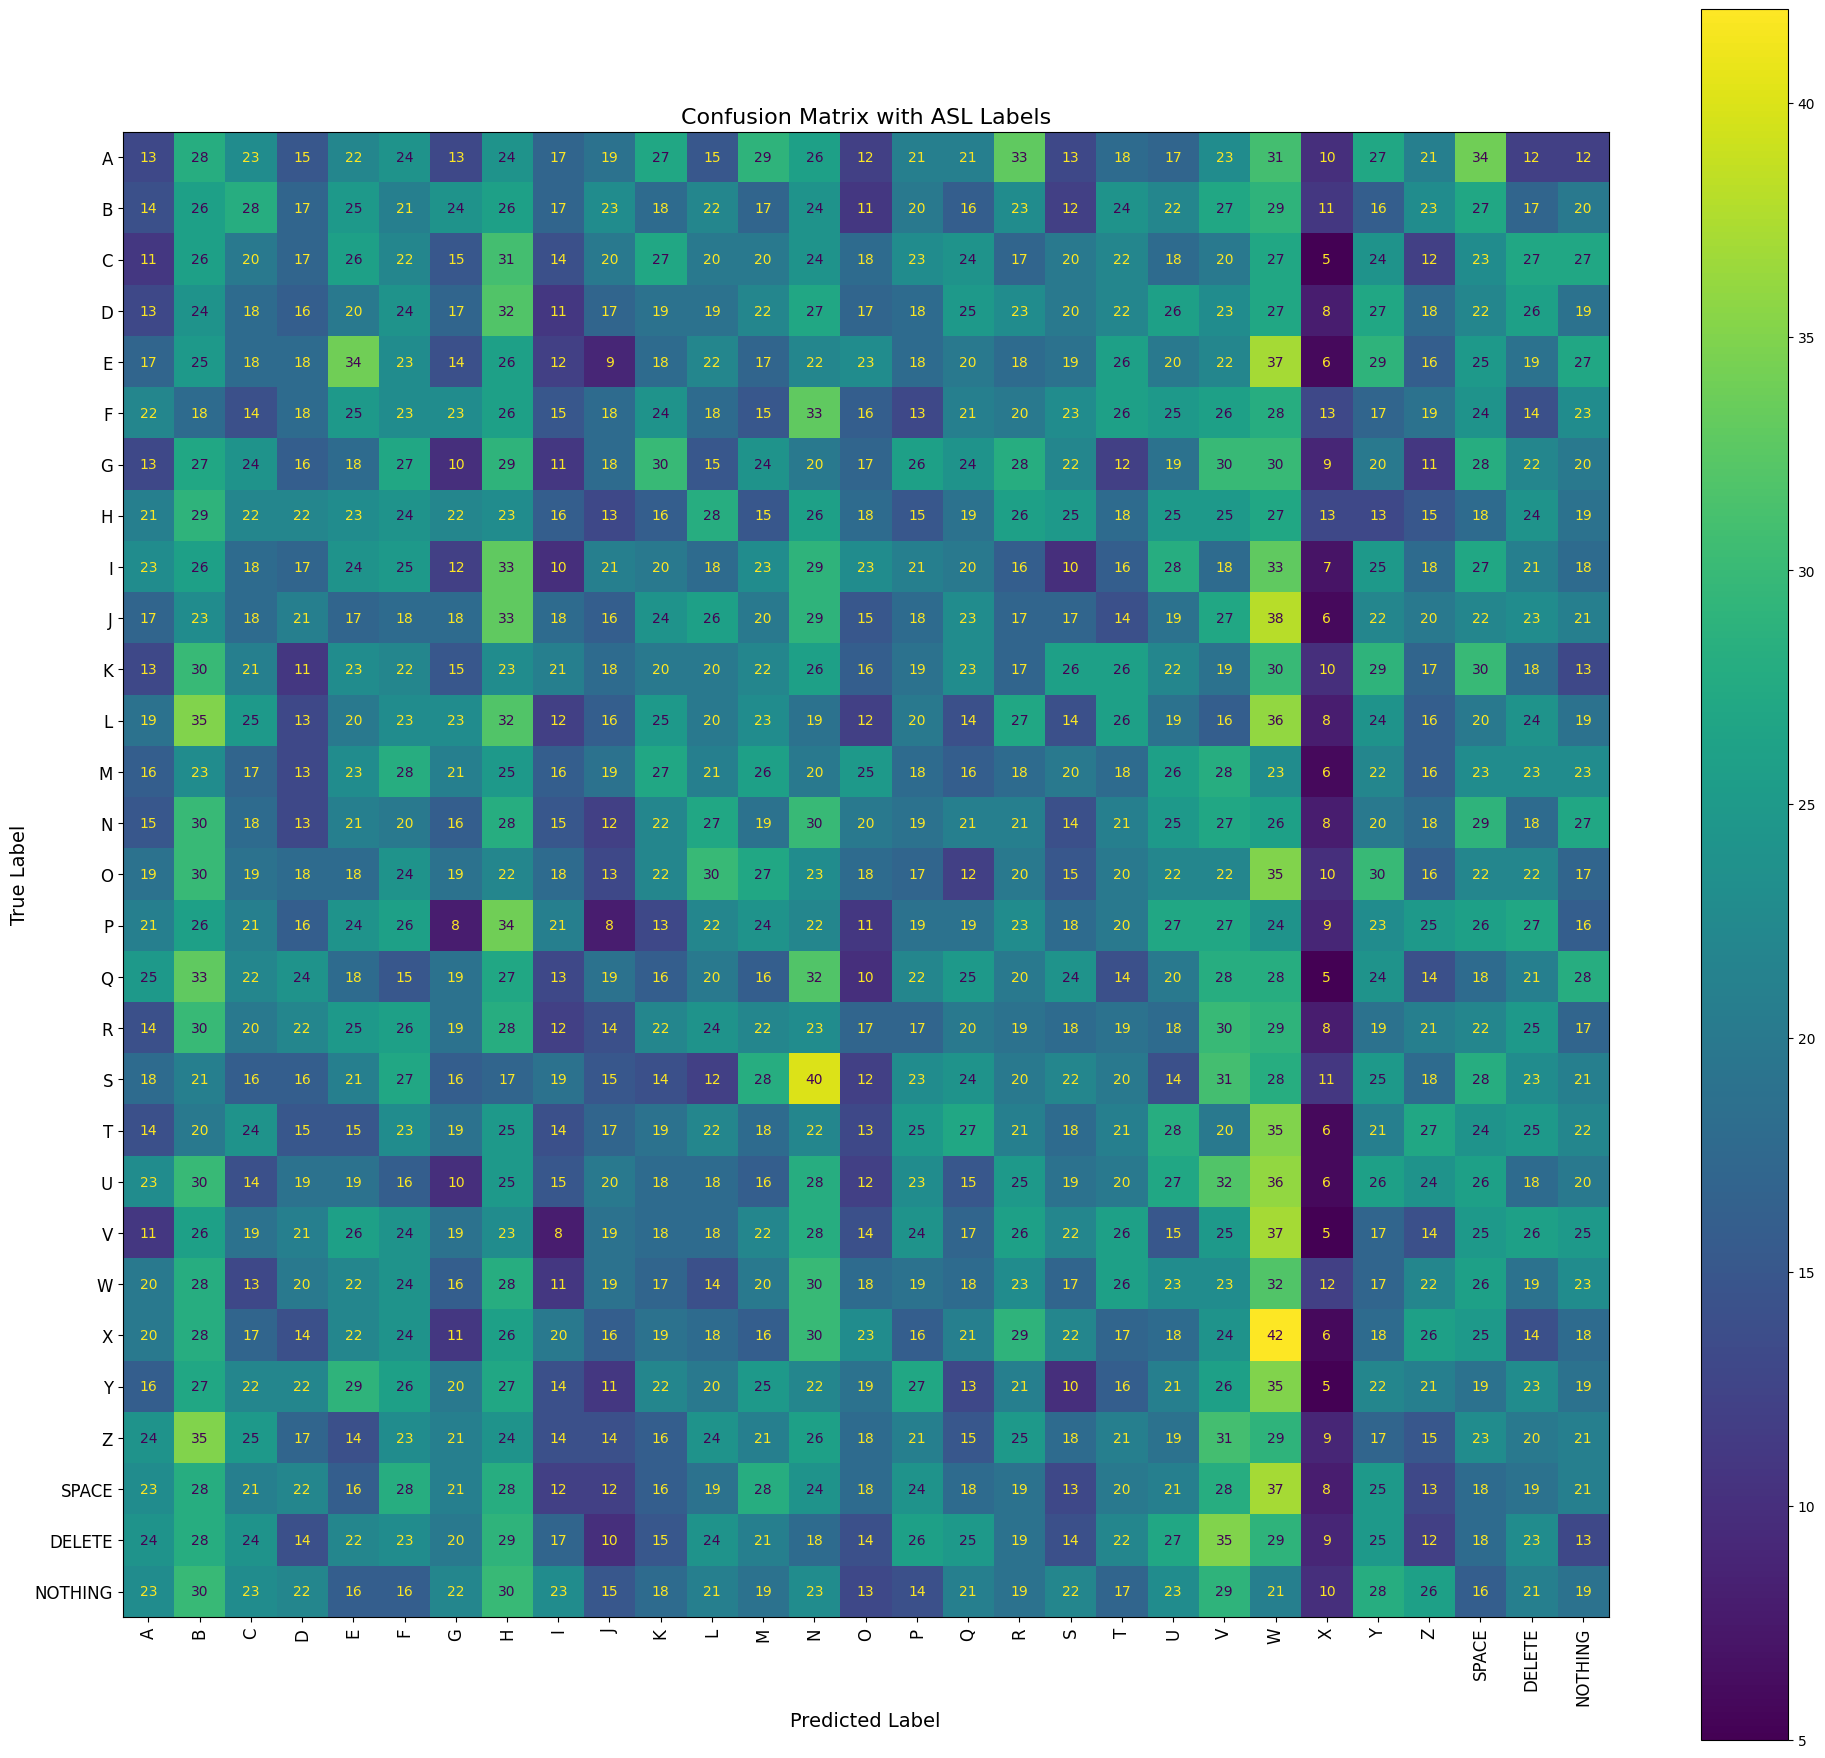

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Class names: A-Z + SPACE, DELETE, NOTHING
class_names = list("ABCDEFGHIJKLMNOPQRSTUVWXYZ") + ['SPACE', 'DELETE', 'NOTHING']

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

# Increase figure size
fig, ax = plt.subplots(figsize=(20, 18))

# Display with larger labels and font
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap='viridis', xticks_rotation=90, ax=ax, colorbar=True)

# Make text larger
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title("Confusion Matrix with ASL Labels", fontsize=16)
plt.xlabel("Predicted Label", fontsize=14)
plt.ylabel("True Label", fontsize=14)
plt.tight_layout()
plt.show()


In [ ]:
plt.savefig("confusion_matrix_asl.png", dpi=300)

<Figure size 640x480 with 0 Axes>

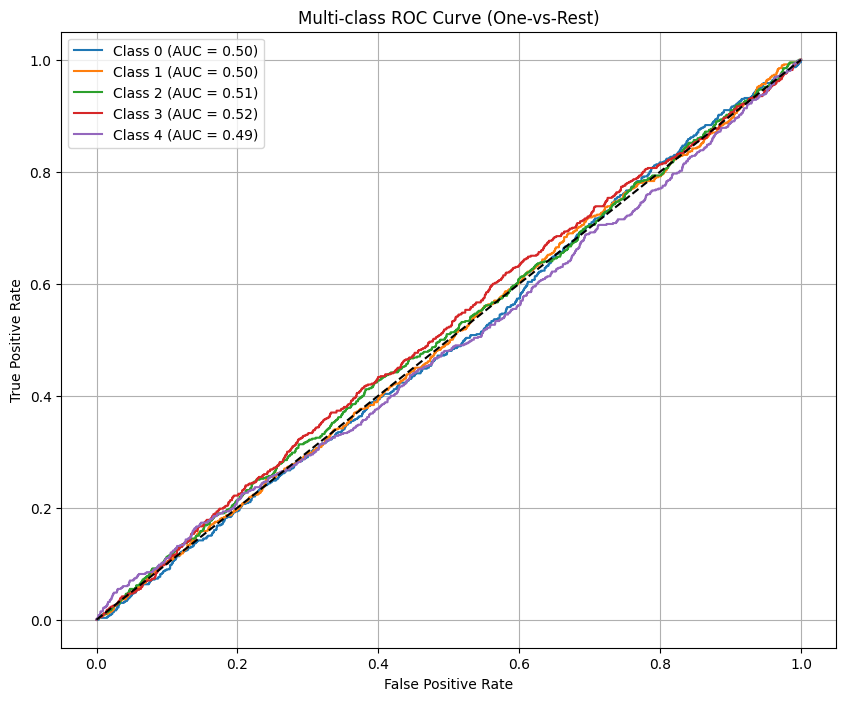

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.metrics import RocCurveDisplay

# Binarize the labels for multi-class ROC
n_classes = y_test.shape[1]
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for a few classes
plt.figure(figsize=(10, 8))
for i in range(5):  # Show ROC for first 5 classes only (to avoid clutter)
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.title('Multi-class ROC Curve (One-vs-Rest)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
import os
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

# Load the trained model
model = load_model("asl_model.h5")

# Define path to test directory
test_dir = "/content/drive/MyDrive/Unified Mentor Projects/Data files/asl_alphabet_test"

# Class names (match training folder names in sorted order)
class_names = sorted(os.listdir("/content/asl_alphabet_train/asl_alphabet_train"))

# Handle mapping manually if needed
class_names = [cls.replace("del", "DELETE").replace("nothing", "NOTHING").replace("space", "SPACE").upper()
               for cls in class_names]


In [ ]:
# Helper function to predict a single image
def predict_image(img_path):
    img = image.load_img(img_path, target_size=(198, 198))  # ✅ Resize to match model
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) / 255.0    # Shape: (1, 198, 198, 3)

    prediction = model.predict(img_array)
    predicted_class = class_names[np.argmax(prediction)]
    return predicted_class

# Loop through each test image and evaluate
correct = 0
total = 0

for file in os.listdir(test_dir):
    if file.endswith(".jpg"):
        actual_class = file.split("_")[0].upper()
        if actual_class == "DEL":
            actual_class = "DELETE"
        elif actual_class == "NOTHING":
            actual_class = "NOTHING"
        elif actual_class == "SPACE":
            actual_class = "SPACE"

        predicted_class = predict_image(os.path.join(test_dir, file))

        print(f"Actual: {actual_class}, Predicted: {predicted_class}")
        if actual_class == predicted_class:
            correct += 1
        total += 1

accuracy = correct / total
print(f"\nTest Accuracy: {accuracy * 100:.2f}%")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 832ms/step
Actual: C, Predicted: C
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Actual: I, Predicted: I
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Actual: SPACE, Predicted: SPACE
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Actual: F, Predicted: F
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Actual: L, Predicted: L
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Actual: B, Predicted: B
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Actual: N, Predicted: N
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Actual: G, Predicted: G
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Actual: K, Predicted: K
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
Actual: R, Predicted: R
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Actual: NOTHING, Predicted: NOTHING
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
Actual: W, Predicted: W
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Actual: M, Predicted: M
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Actual: Y, Predicted: Y
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Actual: T, Predicted: T
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Actual: V, 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


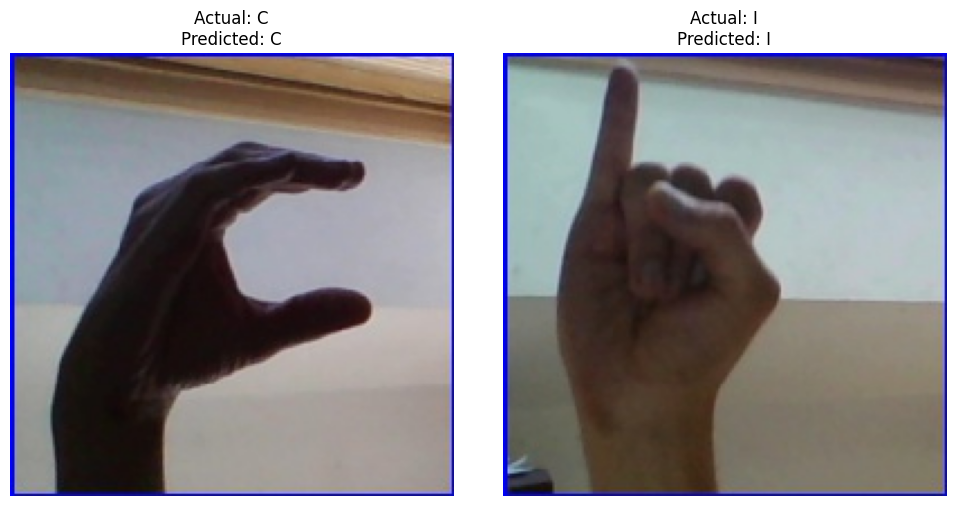

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


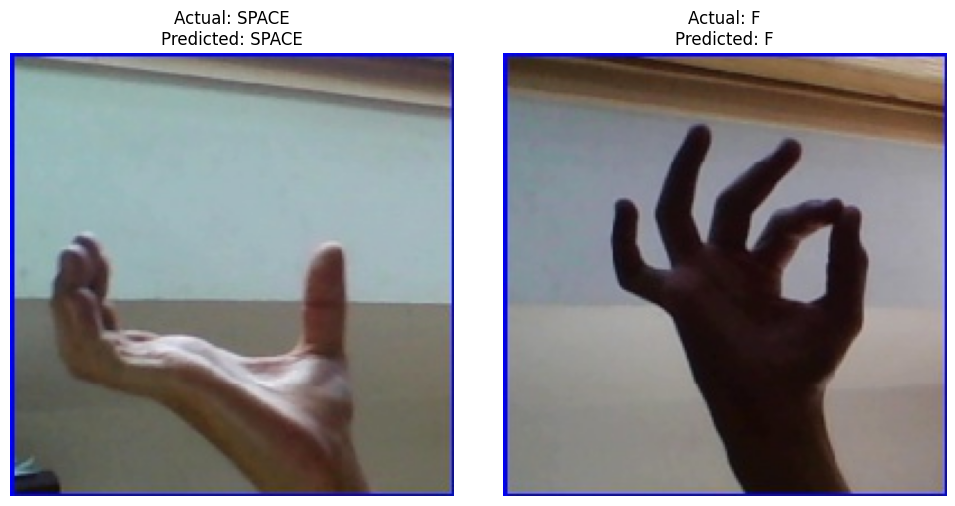

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


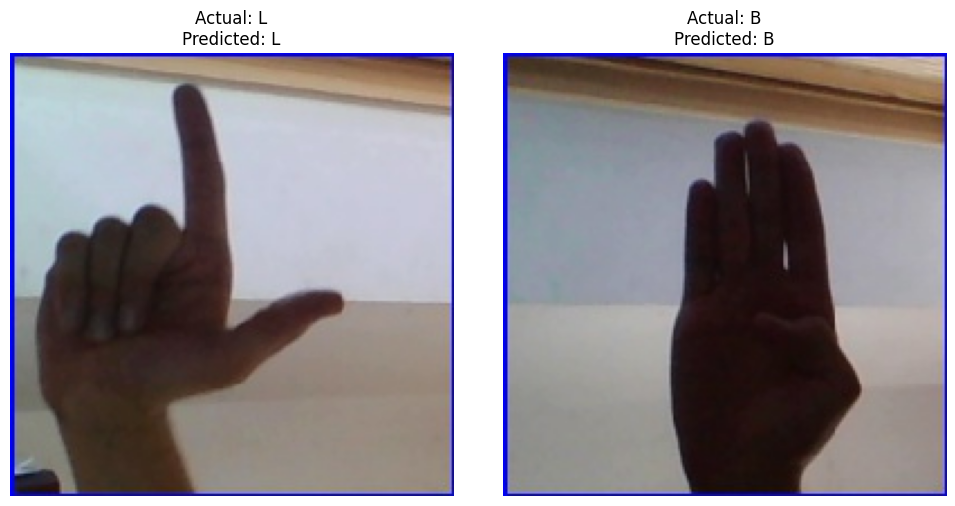

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


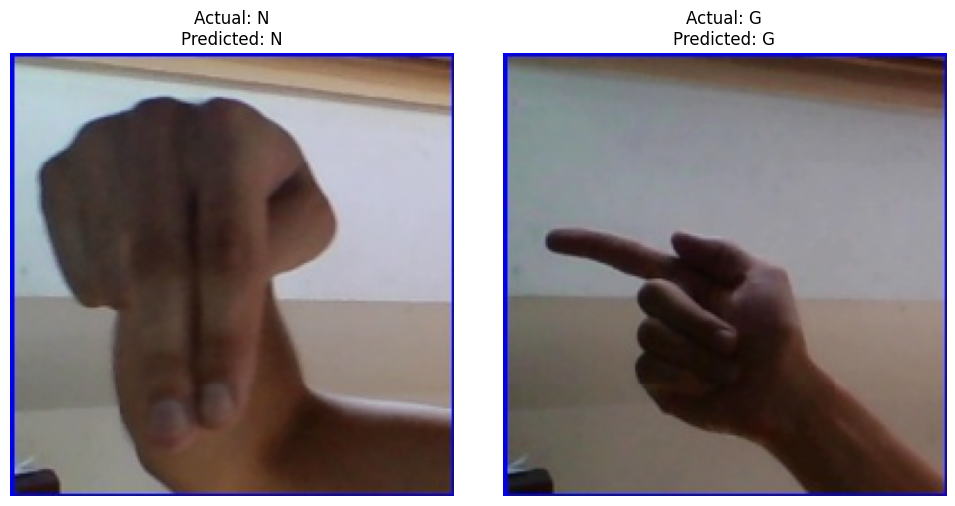

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


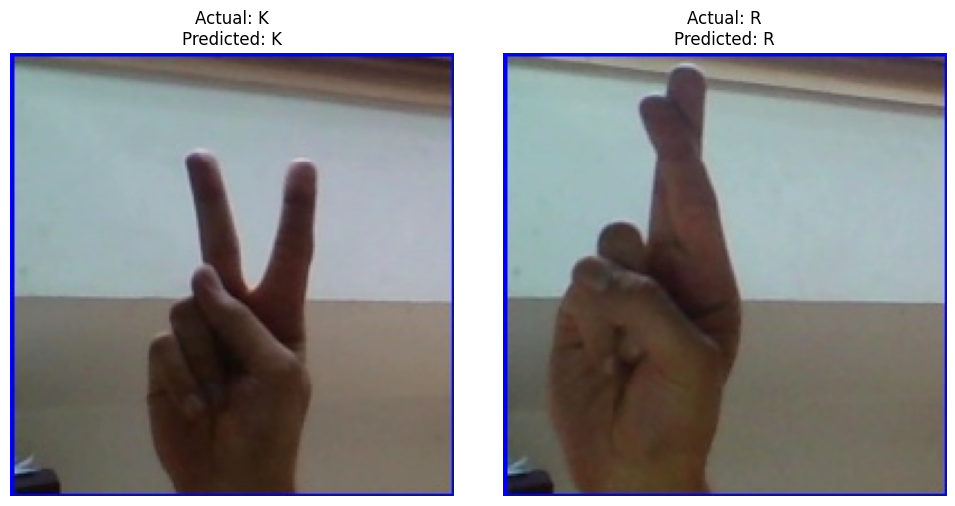

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


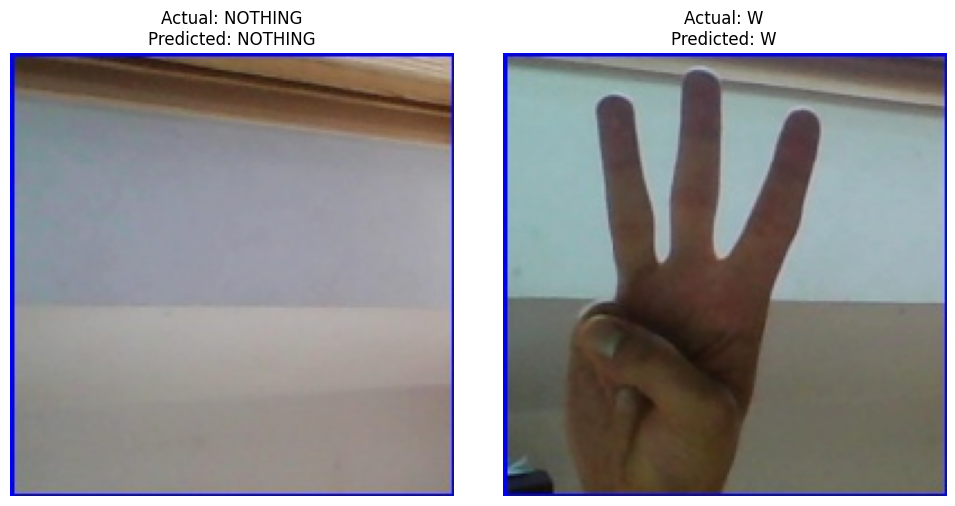

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


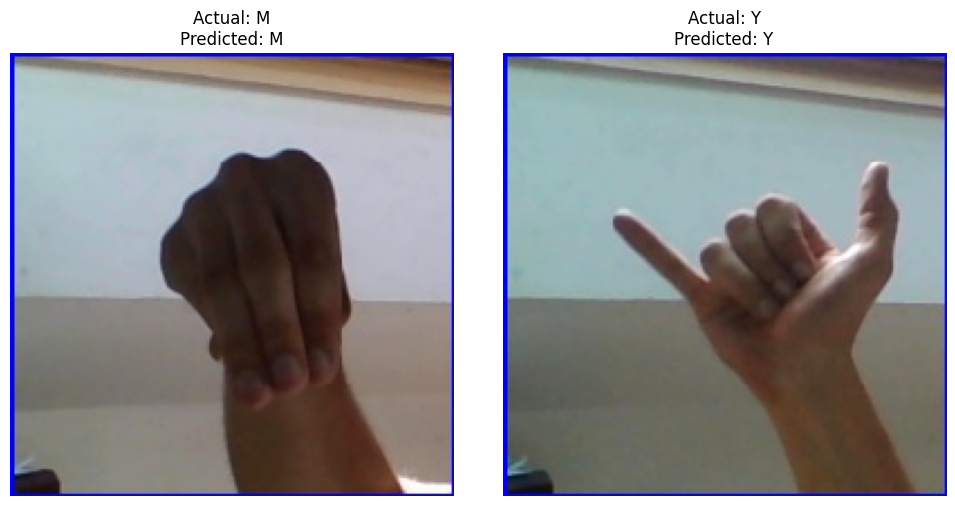

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


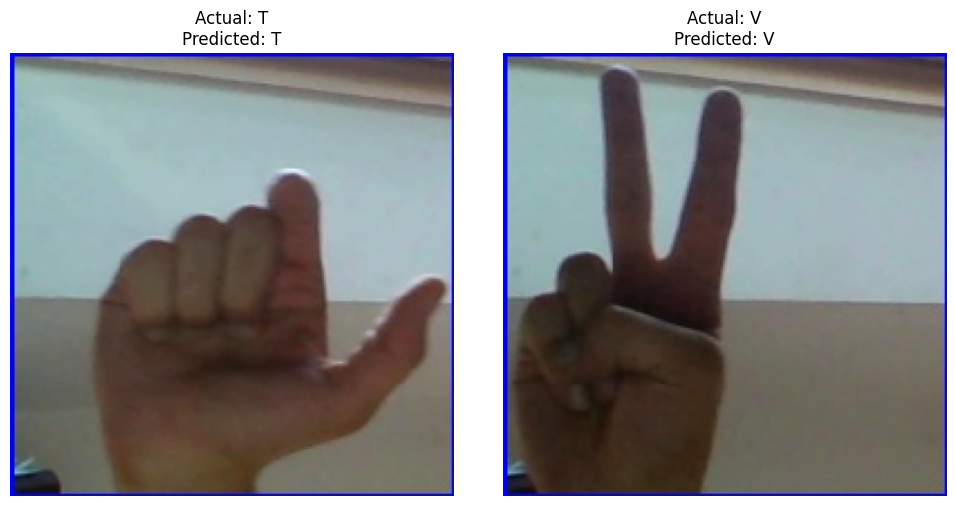

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


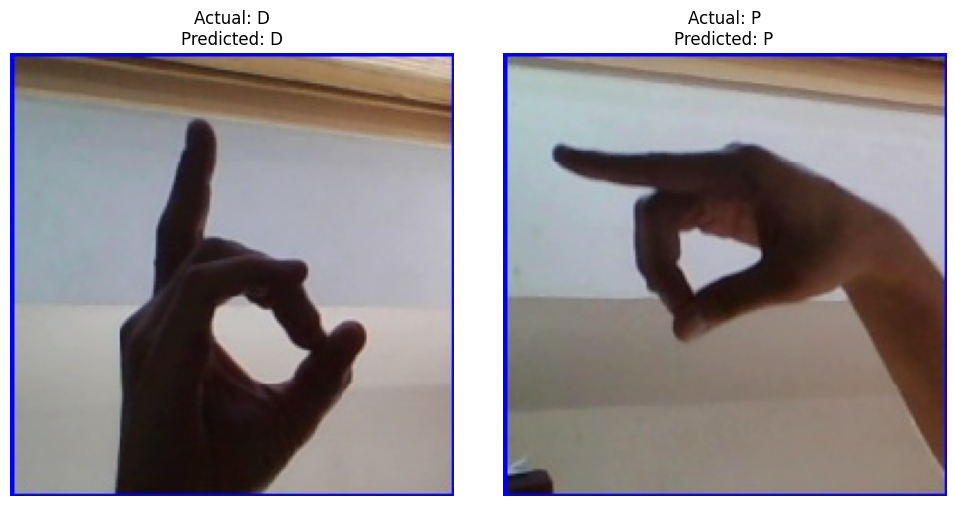

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


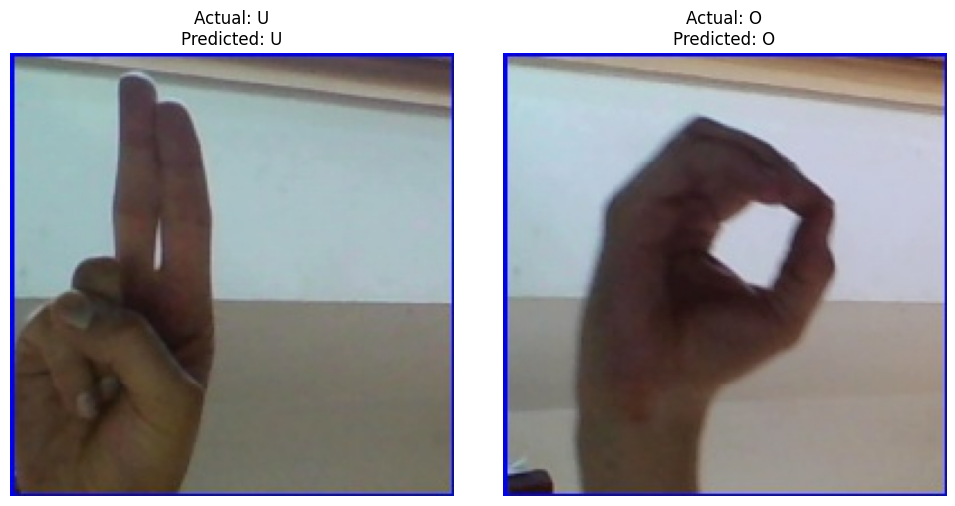

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


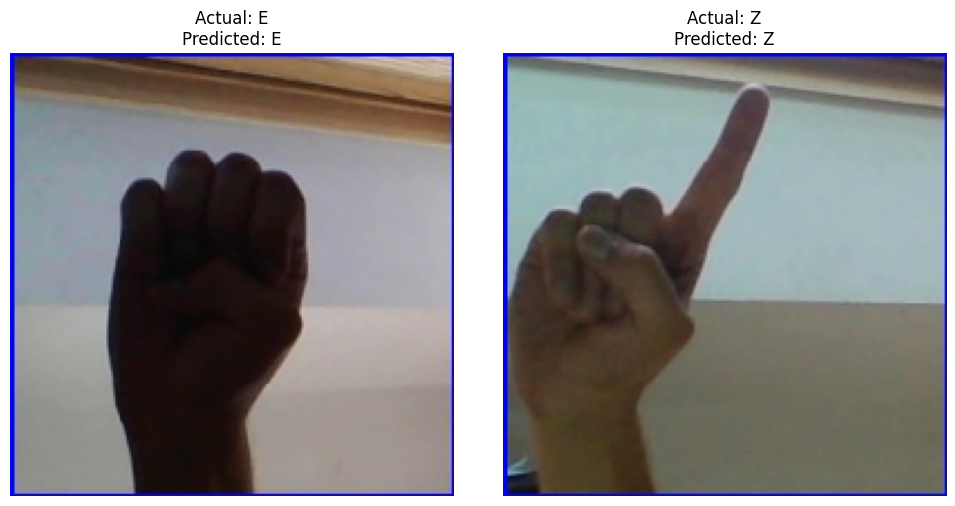

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


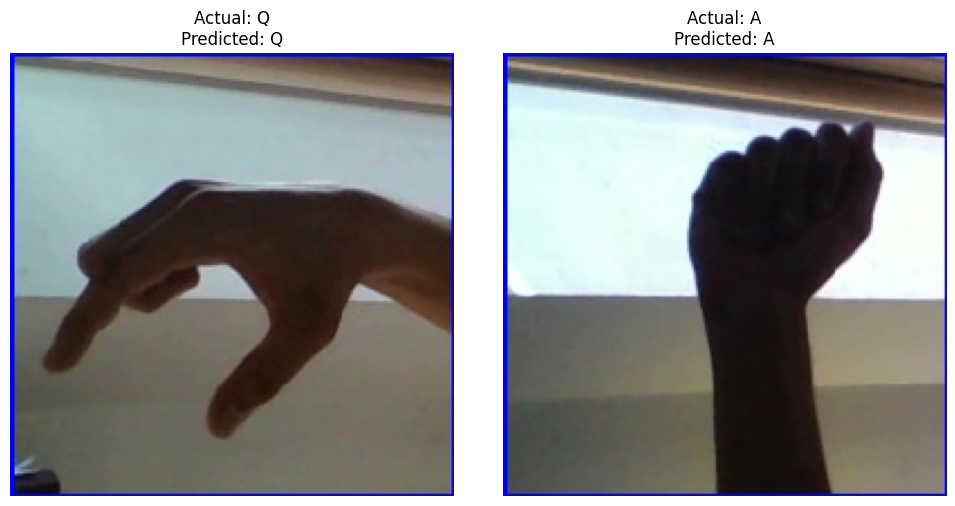

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


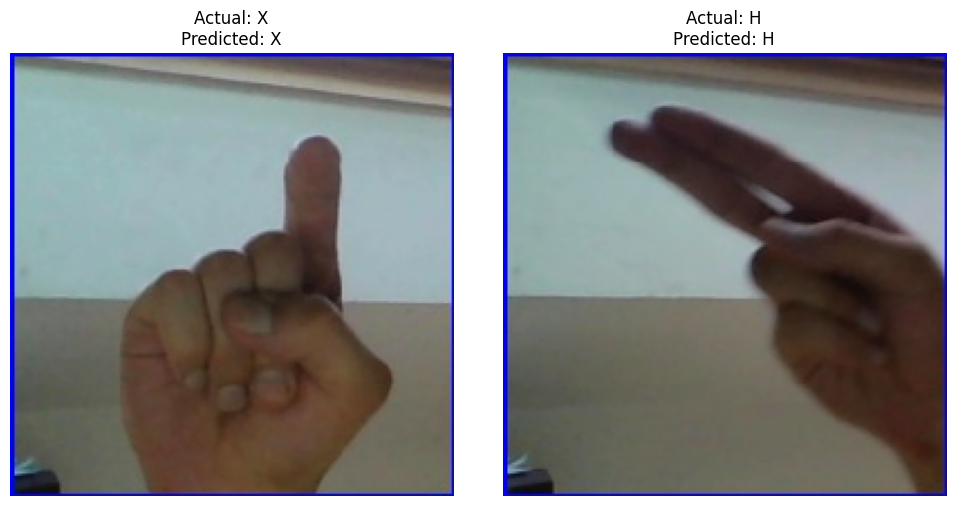

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


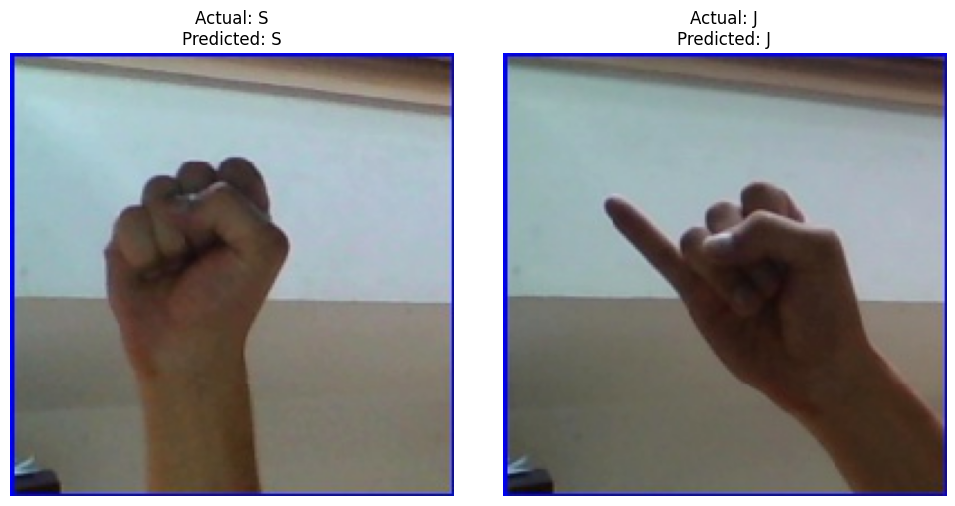


Test Accuracy: 100.00%


In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

# Predict function
def predict_image(img_path):
    img = image.load_img(img_path, target_size=(198, 198))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) / 255.0
    prediction = model.predict(img_array)
    predicted_class = class_names[np.argmax(prediction)]
    return predicted_class, img  # Return both label and image

# Initialize
correct = 0
total = 0
images_shown = 0
image_pairs = []

# Collect predictions
for file in os.listdir(test_dir):
    if file.endswith(".jpg"):
        actual_class = file.split("_")[0].upper()
        if actual_class == "DEL":
            actual_class = "DELETE"
        elif actual_class == "NOTHING":
            actual_class = "NOTHING"
        elif actual_class == "SPACE":
            actual_class = "SPACE"

        predicted_class, img = predict_image(os.path.join(test_dir, file))

        if actual_class == predicted_class:
            correct += 1
        total += 1

        # Store pair for side-by-side display
        image_pairs.append((img, actual_class, predicted_class))
        images_shown += 1

        # Display two images per row
        if images_shown % 2 == 0:
            fig, axs = plt.subplots(1, 2, figsize=(10, 5))
            for i in range(2):
                axs[i].imshow(image_pairs[-2 + i][0])
                axs[i].set_title(f"Actual: {image_pairs[-2 + i][1]}\nPredicted: {image_pairs[-2 + i][2]}", fontsize=12)
                axs[i].axis('off')
            plt.tight_layout()
            plt.show()

# Accuracy summary
accuracy = correct / total
print(f"\nTest Accuracy: {accuracy * 100:.2f}%")
